<a href="https://colab.research.google.com/github/ibratrk/test/blob/main/ML_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



### **Partners**: Ibrahim el turk - Mohammad Hasoun

---





Email Spam Detection Using Multiple Machine Learning Algorithms

### 1. Data Overview

Upload the file

In [55]:
from google.colab import files
files.upload()


Saving SMSSpamCollection to SMSSpamCollection (1)


{'SMSSpamCollection (1)': b'ham\tGo until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...\nham\tOk lar... Joking wif u oni...\nspam\tFree entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C\'s apply 08452810075over18\'s\nham\tU dun say so early hor... U c already then say...\nham\tNah I don\'t think he goes to usf, he lives around here though\nspam\tFreeMsg Hey there darling it\'s been 3 week\'s now and no word back! I\'d like some fun you up for it still? Tb ok! XxX std chgs to send, \xc2\xa31.50 to rcv\nham\tEven my brother is not like to speak with me. They treat me like aids patent.\nham\tAs per your request \'Melle Melle (Oru Minnaminunginte Nurungu Vettam)\' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune\nspam\tWINNER!! As a valued network customer you have been selected to receivea \xc2\xa3900 prize reward! To cl

Load the dataset

In [56]:
import pandas as pd

data = pd.read_csv(
    "SMSSpamCollection",
    sep="\t",
    header=None,
    names=["label", "message"]
)

data.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


Display the shape of the dataset before cleaning

In [57]:
print("Dataset Shape:", data.shape)

Dataset Shape: (5572, 2)


Display dataset information


In [58]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    5572 non-null   object
 1   message  5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


### 2. Clean & Encode

Check for missing values


In [59]:
data.isnull().sum()

,0
label,0
message,0


Check for duplicates


In [60]:
duplicates = data.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

# Remove duplicates
data.drop_duplicates(inplace=True)

#shape after removing dupliactes
print("Dataset Shape:", data.shape)


Number of duplicate rows: 403
Dataset Shape: (5169, 2)


Label Encoding

In [61]:
data["label"] = data["label"].map({"ham": 0, "spam": 1})
data["label"].value_counts()

,count
label,
0,4516
1,653


Text Preprocessing

In [62]:
import string

def clean_text(text):
    text = text.lower()
    text = text.translate(str.maketrans("", "", string.punctuation))
    return text

data["message"] = data["message"].apply(clean_text)


### 3. Data Visualization

Class Distribution

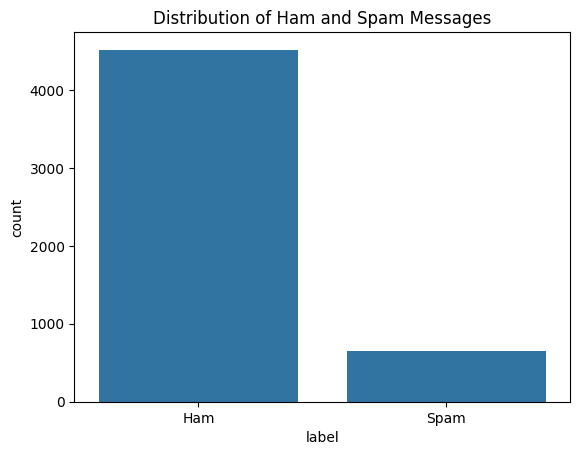

In [63]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count of ham vs spam
sns.countplot(x="label", data=data)
plt.xticks([0,1], ["Ham", "Spam"])
plt.title("Distribution of Ham and Spam Messages")
plt.show()


Message Length Distribution


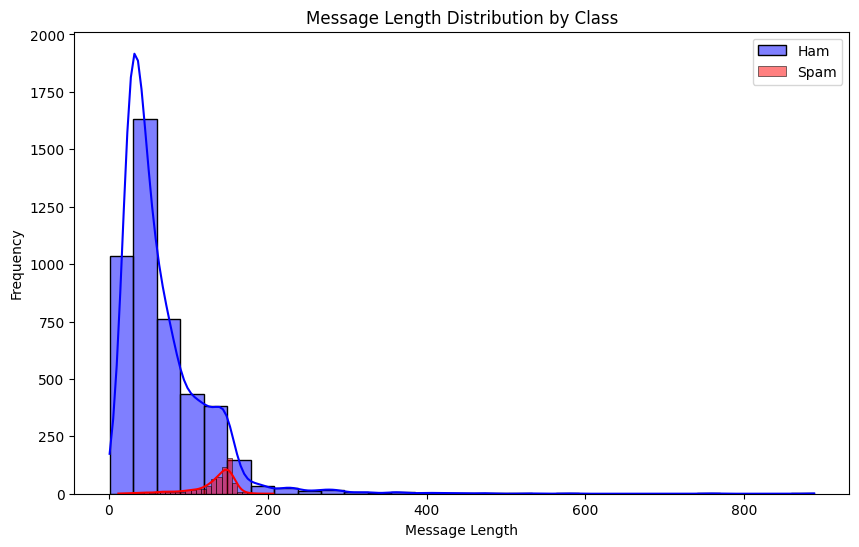

In [64]:
# Create numeric feature
data["message_length"] = data["message"].apply(len)

plt.figure(figsize=(10,6))
sns.histplot(data[data["label"]==0]["message_length"], color="blue", label="Ham", kde=True, bins=30)
sns.histplot(data[data["label"]==1]["message_length"], color="red", label="Spam", kde=True, bins=30)
plt.title("Message Length Distribution by Class")
plt.xlabel("Message Length")
plt.ylabel("Frequency")
plt.legend()
plt.show()


### 4. Correlation Matrix

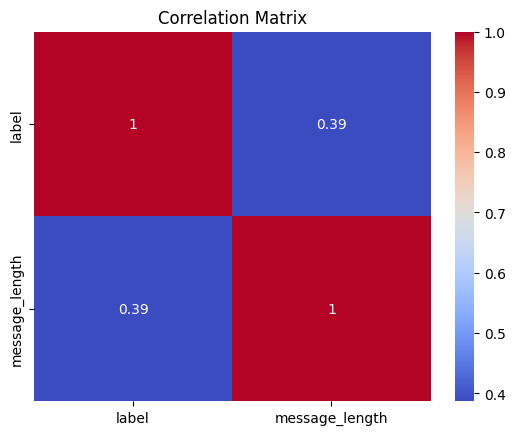

In [101]:
sns.heatmap(data[["label","message_length"]].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()


### 5. Model comparison and Evaluation

Load Libraries

In [66]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score

Split features and target

In [67]:
X = data["message"]
y = data["label"]

Train-test split

In [68]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Create the TF-IDF vectorizer (Term Frequency - Inverse Document Frequency)

In [69]:
tfidf = TfidfVectorizer(stop_words="english", max_features=6000)
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

#Fit on training data and transform both train and test
print("TF-IDF feature matrix shape (train):", X_train_tfidf.shape)
print("TF-IDF feature matrix shape (test):", X_test_tfidf.shape)

TF-IDF feature matrix shape (train): (4135, 6000)
TF-IDF feature matrix shape (test): (1034, 6000)


Define models

In [70]:
models = {
    "Naive Bayes": MultinomialNB(),
    "KNN": KNeighborsClassifier(n_neighbors=5, metric="cosine"),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42)
}

Cross-validation on TF-IDF features

In [71]:
from sklearn.model_selection import cross_val_score

for name, model in models.items():
    scores = cross_val_score(
        model,
        X_train_tfidf,
        y_train,
        cv=5,
        scoring="f1"
    )
    print(f"{name} 5-Fold CV F1-score: {scores.mean():.4f}")

Naive Bayes 5-Fold CV F1-score: 0.8109
KNN 5-Fold CV F1-score: 0.8049
Decision Tree 5-Fold CV F1-score: 0.8078
Random Forest 5-Fold CV F1-score: 0.8763



---

### **Naive Bayes implementation**

Instantiate & Train Naive Bayes

In [72]:
nb_model = MultinomialNB()

# Train the model
nb_model.fit(X_train_tfidf, y_train)

MultinomialNB()

Make Predictions

In [73]:
y_pred_nb = nb_model.predict(X_test_tfidf)

Evaluate Performance

In [74]:
acc_nb = accuracy_score(y_test, y_pred_nb)
conf_mat = confusion_matrix(y_test, y_pred_nb)
report = classification_report(y_test, y_pred_nb, target_names=["Ham", "Spam"])

print(f"Naive Bayes Accuracy: {acc_nb:.4f}")
print("Confusion Matrix:\n", conf_mat)
print("Classification Report:\n", report)

Naive Bayes Accuracy: 0.9710
Confusion Matrix:
 [[894   0]
 [ 30 110]]
Classification Report:
               precision    recall  f1-score   support

         Ham       0.97      1.00      0.98       894
        Spam       1.00      0.79      0.88       140

    accuracy                           0.97      1034
   macro avg       0.98      0.89      0.93      1034
weighted avg       0.97      0.97      0.97      1034



visualizng confusion matrix for Naive Bayes

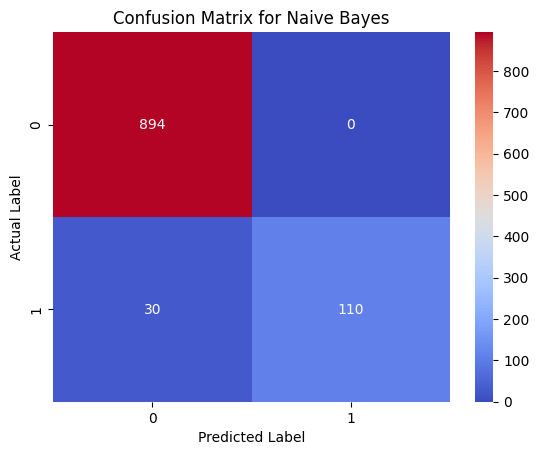

In [75]:
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='coolwarm')
plt.title('Confusion Matrix for Naive Bayes')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

ROC for Naive Bayes (Receiver Operating Characteristic)

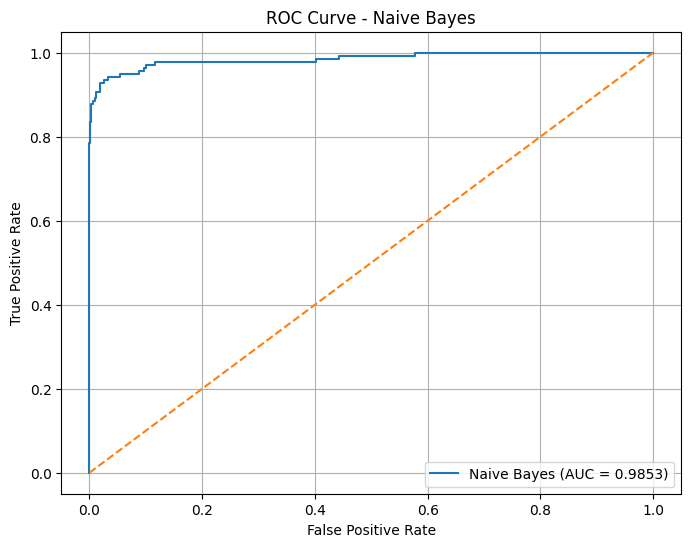

In [76]:
from sklearn.metrics import roc_curve, auc

# Predict probabilities
y_prob_nb = nb_model.predict_proba(X_test_tfidf)[:, 1]

# ROC values
fpr_nb, tpr_nb, _ = roc_curve(y_test, y_prob_nb)
auc_nb = auc(fpr_nb, tpr_nb)

# Plot ROC Curve
plt.figure(figsize=(8,6))
plt.plot(fpr_nb, tpr_nb, label=f'Naive Bayes (AUC = {auc_nb:.4f})')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Naive Bayes')
plt.legend()
plt.grid(True)
plt.show()


---

### **KNN implementation**

Best K based on F1-score

K =  1 | Accuracy = 0.9391 | F1-score (Spam) = 0.7296
K =  2 | Accuracy = 0.9275 | F1-score (Spam) = 0.6341
K =  3 | Accuracy = 0.9284 | F1-score (Spam) = 0.6408
K =  4 | Accuracy = 0.9091 | F1-score (Spam) = 0.4946
K =  5 | Accuracy = 0.9091 | F1-score (Spam) = 0.4946
K =  6 | Accuracy = 0.8975 | F1-score (Spam) = 0.3908
K =  7 | Accuracy = 0.8975 | F1-score (Spam) = 0.3908
K =  8 | Accuracy = 0.8878 | F1-score (Spam) = 0.2927
K =  9 | Accuracy = 0.8878 | F1-score (Spam) = 0.2927
K = 10 | Accuracy = 0.8820 | F1-score (Spam) = 0.2278
K = 11 | Accuracy = 0.8820 | F1-score (Spam) = 0.2278
K = 12 | Accuracy = 0.8762 | F1-score (Spam) = 0.1579
K = 13 | Accuracy = 0.8762 | F1-score (Spam) = 0.1579
K = 14 | Accuracy = 0.8723 | F1-score (Spam) = 0.1081
K = 15 | Accuracy = 0.8723 | F1-score (Spam) = 0.1081
K = 16 | Accuracy = 0.8714 | F1-score (Spam) = 0.0952
K = 17 | Accuracy = 0.8714 | F1-score (Spam) = 0.0952
K = 18 | Accuracy = 0.8714 | F1-score (Spam) = 0.0952
K = 19 | Accuracy = 0.8714 |

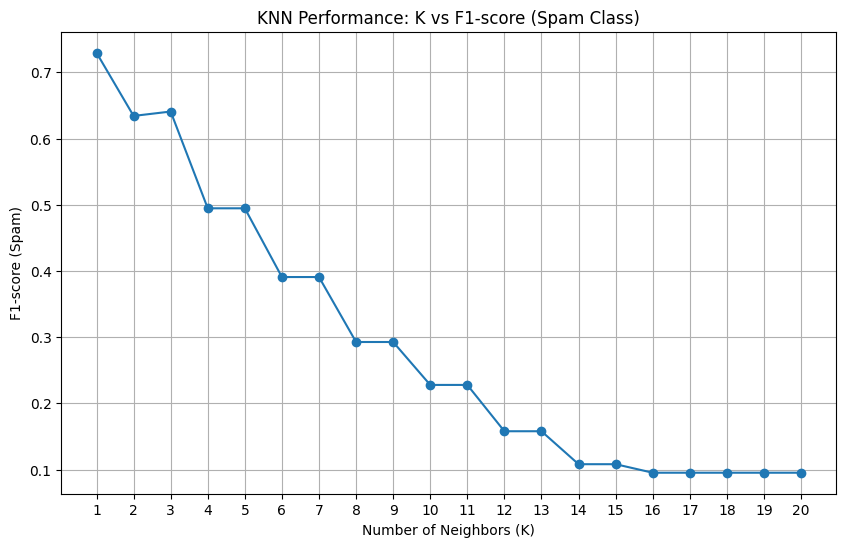

In [77]:
# Try different K values
k_values = range(1, 21)
accuracy_scores = []
f1_scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_tfidf, y_train)

    y_pred = knn.predict(X_test_tfidf)

    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, pos_label=1)

    accuracy_scores.append(acc)
    f1_scores.append(f1)

    print(f"K = {k:2d} | Accuracy = {acc:.4f} | F1-score (Spam) = {f1:.4f}")

# Best K based on F1-score
best_k_index = np.argmax(f1_scores)
best_k = k_values[best_k_index]

print("\nBest K based on maximum F1-score (Spam class):")
print(f"K = {best_k}")
print(f"Accuracy = {accuracy_scores[best_k_index]:.4f}")
print(f"F1-score = {f1_scores[best_k_index]:.4f}")

# Plot K vs F1-score
plt.figure(figsize=(10, 6))
plt.plot(k_values, f1_scores, marker='o')
plt.xticks(k_values)
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('F1-score (Spam)')
plt.title('KNN Performance: K vs F1-score (Spam Class)')
plt.grid(True)
plt.show()


Best K value based on Elbow Method

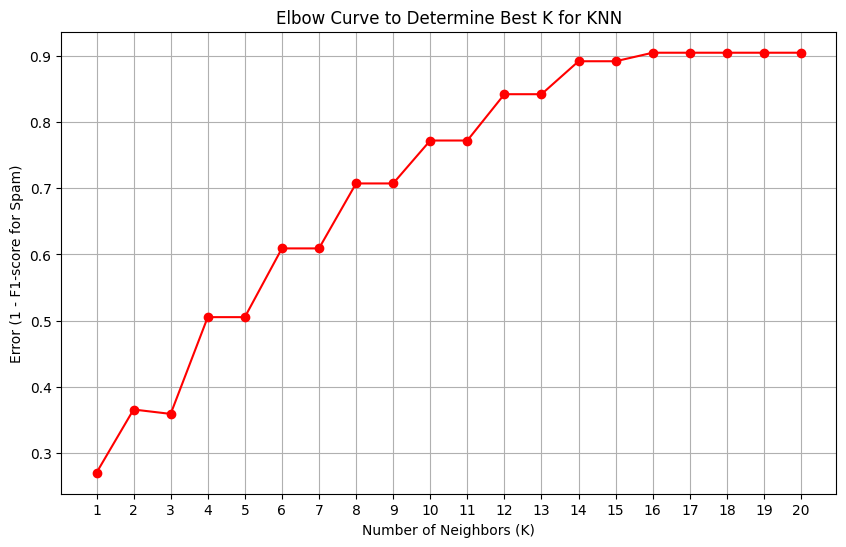

Best K value based on Elbow Method: 1
Minimum Error (1-F1): 0.2704


In [78]:
# Elbow Method: Use 1-F1 score as "error"
k_range = range(1, 21)
error_values = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_tfidf, y_train)
    y_pred = knn.predict(X_test_tfidf)

    error = 1 - f1_score(y_test, y_pred, pos_label=1)
    error_values.append(error)

# Plot Elbow Curve
plt.figure(figsize=(10,6))
plt.plot(k_range, error_values, marker='o', color='red')
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Error (1 - F1-score for Spam)')
plt.title('Elbow Curve to Determine Best K for KNN')
plt.xticks(k_range)
plt.grid(True)
plt.show()

# Best K based on minimum error
best_k_elbow = k_range[np.argmin(error_values)]
print(f"Best K value based on Elbow Method: {best_k_elbow}")
print(f"Minimum Error (1-F1): {min(error_values):.4f}")


Instantiate & Train KNN

In [79]:
knn_model = KNeighborsClassifier(n_neighbors=1)
knn_model.fit(X_train_tfidf, y_train)

KNeighborsClassifier(n_neighbors=1)

Make Predictions

In [80]:
y_pred_knn = knn_model.predict(X_test_tfidf)

Evaluate Performance

In [81]:
acc_knn = accuracy_score(y_test, y_pred_knn)
conf_mat_knn = confusion_matrix(y_test, y_pred_knn)
report_knn = classification_report(y_test, y_pred_knn, target_names=["Ham", "Spam"])

print(f"KNN Accuracy: {acc_knn:.4f}")
print("Confusion Matrix:\n", conf_mat_knn)
print("Classification Report:\n", report_knn)

KNN Accuracy: 0.9391
Confusion Matrix:
 [[886   8]
 [ 55  85]]
Classification Report:
               precision    recall  f1-score   support

         Ham       0.94      0.99      0.97       894
        Spam       0.91      0.61      0.73       140

    accuracy                           0.94      1034
   macro avg       0.93      0.80      0.85      1034
weighted avg       0.94      0.94      0.93      1034



Confusion Matrix for KNN'

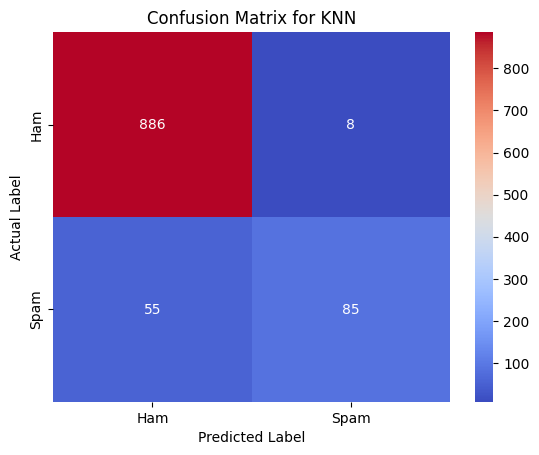

In [82]:
sns.heatmap(conf_mat_knn, annot=True, fmt='d', cmap='coolwarm',
            xticklabels=['Ham','Spam'], yticklabels=['Ham','Spam'])
plt.title('Confusion Matrix for KNN')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

KNN OVERFITTING


K= 1 | Train Error=0.0010 | Test Error=0.2704
K= 2 | Train Error=0.2922 | Test Error=0.3659
K= 3 | Train Error=0.2825 | Test Error=0.3592
K= 4 | Train Error=0.4848 | Test Error=0.5054
K= 5 | Train Error=0.4827 | Test Error=0.5054
K= 6 | Train Error=0.5833 | Test Error=0.6092
K= 7 | Train Error=0.5809 | Test Error=0.6092
K= 8 | Train Error=0.6931 | Test Error=0.7073
K= 9 | Train Error=0.6931 | Test Error=0.7073
K=10 | Train Error=0.7843 | Test Error=0.7722
K=11 | Train Error=0.7782 | Test Error=0.7722
K=12 | Train Error=0.8420 | Test Error=0.8421
K=13 | Train Error=0.8354 | Test Error=0.8421
K=14 | Train Error=0.8723 | Test Error=0.8919
K=15 | Train Error=0.8723 | Test Error=0.8919
K=16 | Train Error=0.8965 | Test Error=0.9048
K=17 | Train Error=0.8930 | Test Error=0.9048
K=18 | Train Error=0.9250 | Test Error=0.9048
K=19 | Train Error=0.9178 | Test Error=0.9048
K=20 | Train Error=0.9469 | Test Error=0.9048


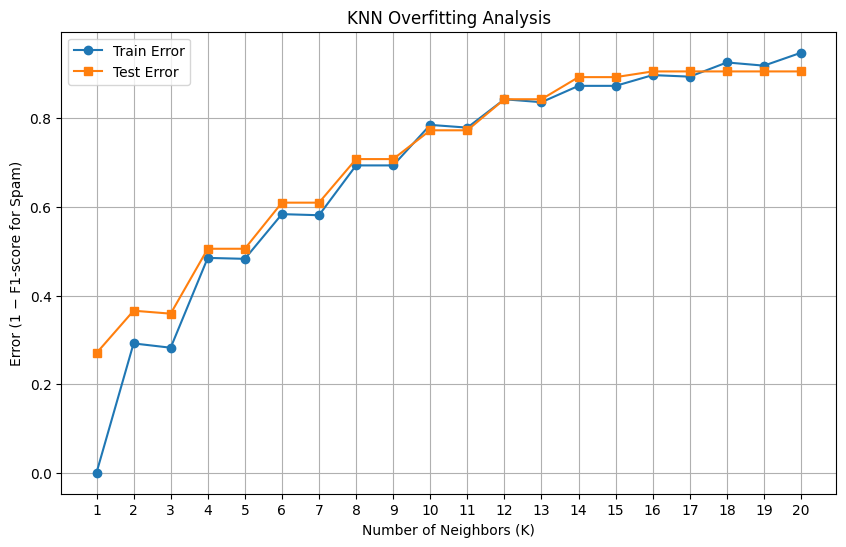

In [83]:
k_values = range(1, 21)
train_error = []
test_error = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_tfidf, y_train)

    # Train F1 (Spam class)
    y_train_pred = knn.predict(X_train_tfidf)
    train_f1 = f1_score(y_train, y_train_pred, pos_label=1)
    train_error.append(1 - train_f1)

    # Test F1 (Spam class)
    y_test_pred = knn.predict(X_test_tfidf)
    test_f1 = f1_score(y_test, y_test_pred, pos_label=1)
    test_error.append(1 - test_f1)

    print(
        f"K={k:2d} | "
        f"Train Error={1 - train_f1:.4f} | "
        f"Test Error={1 - test_f1:.4f}"
    )

# Plot Train vs Test Error
plt.figure(figsize=(10, 6))
plt.plot(k_values, train_error, marker='o', label='Train Error')
plt.plot(k_values, test_error, marker='s', label='Test Error')
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Error (1 − F1-score for Spam)')
plt.title('KNN Overfitting Analysis')
plt.xticks(k_values)
plt.legend()
plt.grid(True)
plt.show()


---
### Decision Tree Implementation

Instantiate & Train Decision Tree

In [84]:
dt_model = DecisionTreeClassifier(max_depth=20, min_samples_split=10,random_state=42)
dt_model.fit(X_train_tfidf, y_train)

DecisionTreeClassifier(max_depth=20, min_samples_split=10, random_state=42)

Make Predictions

In [85]:
y_pred_dt = dt_model.predict(X_test_tfidf)

Evaluate Performance

In [86]:
acc_dt = accuracy_score(y_test, y_pred_dt)
conf_mat_dt = confusion_matrix(y_test, y_pred_dt)
report_dt = classification_report(y_test, y_pred_dt, target_names=["Ham", "Spam"])

print(f"Decision Tree Accuracy: {acc_dt:.4f}")
print("Confusion Matrix:\n", conf_mat_dt)
print("Classification Report:\n", report_dt)

Decision Tree Accuracy: 0.9536
Confusion Matrix:
 [[883  11]
 [ 37 103]]
Classification Report:
               precision    recall  f1-score   support

         Ham       0.96      0.99      0.97       894
        Spam       0.90      0.74      0.81       140

    accuracy                           0.95      1034
   macro avg       0.93      0.86      0.89      1034
weighted avg       0.95      0.95      0.95      1034



Decision Tree Confusion Matrix

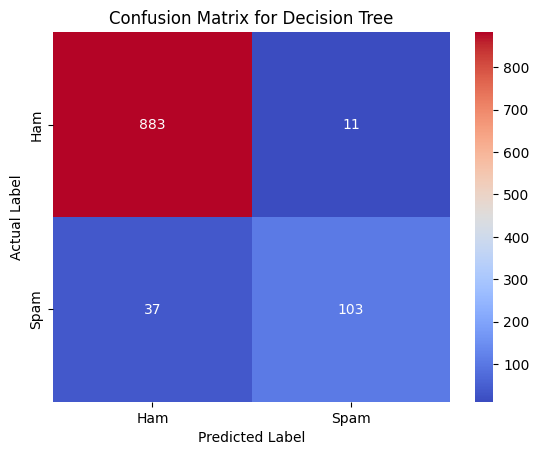

In [87]:
DT_confusion_matrix = confusion_matrix(y_test, y_pred_dt)

sns.heatmap(DT_confusion_matrix, annot=True, fmt='d', cmap='coolwarm',
            xticklabels=['Ham','Spam'], yticklabels=['Ham','Spam'])
plt.title('Confusion Matrix for Decision Tree')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

---
### Random Forest Implementation

Best n_estimators for Random Forest (Classification)

In [88]:
# Try Different n_estimators
n_estimators_list = [10, 20, 50, 100, 200]
f1_scores = []

for n in n_estimators_list:
    rf_model = RandomForestClassifier(n_estimators=n, random_state=42)
    rf_model.fit(X_train_tfidf, y_train)
    y_pred = rf_model.predict(X_test_tfidf)

    f1 = f1_score(y_test, y_pred, pos_label=1)
    f1_scores.append(f1)

    print(f"n_estimators = {n}, F1-score (Spam) = {f1:.4f}")

# Best n_estimators
best_n = n_estimators_list[np.argmax(f1_scores)]
print(f"\nBest n_estimators based on maximum F1-score: {best_n}")
print(f"Maximum F1-score: {max(f1_scores):.4f}")


n_estimators = 10, F1-score (Spam) = 0.8716
n_estimators = 20, F1-score (Spam) = 0.8872
n_estimators = 50, F1-score (Spam) = 0.8819
n_estimators = 100, F1-score (Spam) = 0.9020
n_estimators = 200, F1-score (Spam) = 0.8933

Best n_estimators based on maximum F1-score: 100
Maximum F1-score: 0.9020


Instantiate & Train Random Forest

In [89]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_tfidf, y_train)

RandomForestClassifier(random_state=42)

Make Predictions

In [90]:
y_pred_rf = rf_model.predict(X_test_tfidf)

Evaluate Performance

In [91]:
acc_rf = accuracy_score(y_test, y_pred_rf)
conf_mat_rf = confusion_matrix(y_test, y_pred_rf)
report_rf = classification_report(y_test, y_pred_rf, target_names=["Ham", "Spam"])

print(f"Random Forest Accuracy: {acc_rf:.4f}")
print("Confusion Matrix:\n", conf_mat_rf)
print("Classification Report:\n", report_rf)

Random Forest Accuracy: 0.9758
Confusion Matrix:
 [[894   0]
 [ 25 115]]
Classification Report:
               precision    recall  f1-score   support

         Ham       0.97      1.00      0.99       894
        Spam       1.00      0.82      0.90       140

    accuracy                           0.98      1034
   macro avg       0.99      0.91      0.94      1034
weighted avg       0.98      0.98      0.97      1034



Random Forest Confusion Matrix

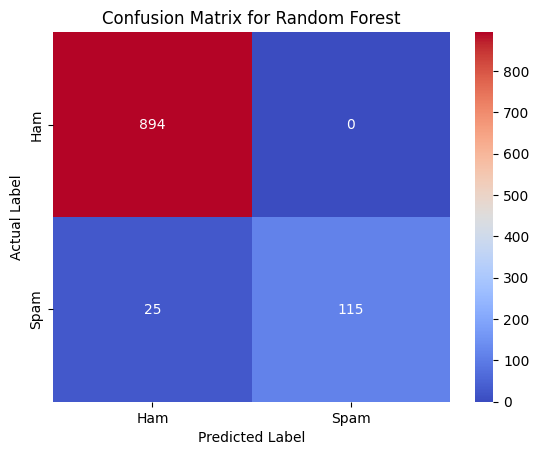

In [92]:
RF_confusion_matrix = confusion_matrix(y_test, y_pred_rf)

sns.heatmap(RF_confusion_matrix, annot=True, fmt='d', cmap='coolwarm',
            xticklabels=['Ham','Spam'], yticklabels=['Ham','Spam'])
plt.title('Confusion Matrix for Random Forest')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

ROC for Random Forest (Best Model)

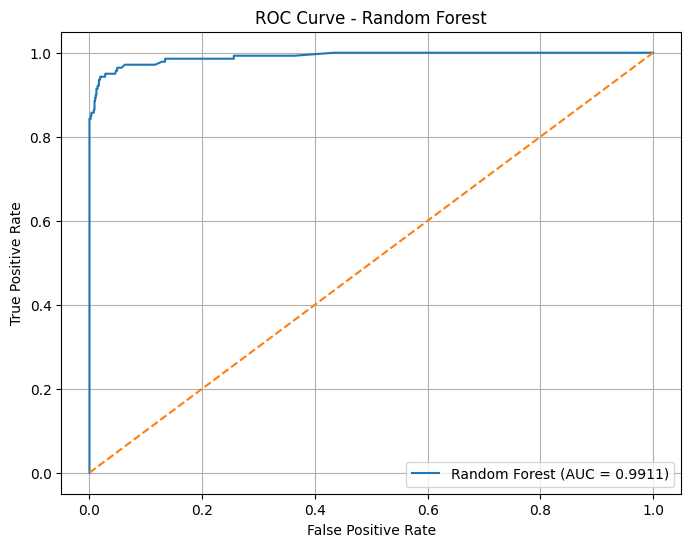

In [93]:
# Predict probabilities
y_prob_rf = rf_model.predict_proba(X_test_tfidf)[:, 1]

# ROC values
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf)
auc_rf = auc(fpr_rf, tpr_rf)

# Plot ROC Curve
plt.figure(figsize=(8,6))
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {auc_rf:.4f})')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Random Forest')
plt.legend()
plt.grid(True)
plt.show()


Compare ROC Curves

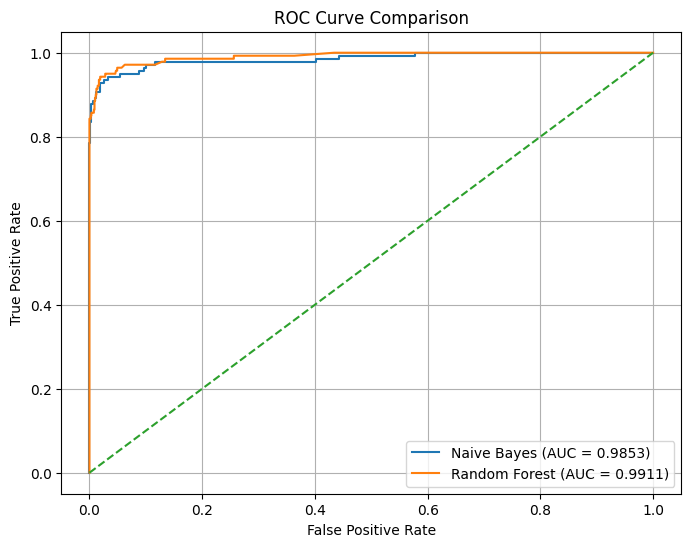

In [94]:
plt.figure(figsize=(8,6))
plt.plot(fpr_nb, tpr_nb, label=f'Naive Bayes (AUC = {auc_nb:.4f})')
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {auc_rf:.4f})')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend()
plt.grid(True)
plt.show()


### 6. UNseen Data Evaluation

In [95]:
from google.colab import files
files.upload()

Saving unseen_sms.csv to unseen_sms (1).csv


{'unseen_sms (1).csv': b'label,text\nham,"Hi Ibrahim, your gym session is confirmed for tomorrow at 6pm."\nspam,Congratulations! You have won a free iPhone. Click now to claim your prize.\nham,Can you send me the final project report by tonight?\nspam,Limited offer! Earn $5000 per week working from home. Register today!\nham,Don\'t forget to submit the assignment before the deadline.\nspam,Your account has been compromised. Verify your details immediately.\nham,Let\'s meet after class to review the database design.\nspam,Exclusive deal just for you! Buy 1 get 3 free. Hurry!\nham,Are we still on for football training this weekend?\nspam,You have been selected for a cash reward. Act fast!\nham,Please review the code I pushed to GitHub.\nspam,URGENT: Your email will be suspended unless you confirm now.\nham,"Thanks for the help yesterday, really appreciate it."\nspam,Get cheap loans with 0% interest. Apply in minutes!\nham,The lecture has been postponed to next Monday.\nspam,Click this li

Load CSV

In [96]:
import pandas as pd

unseen = pd.read_csv("unseen_sms.csv")

# Rename columns to match training code
unseen.rename(columns={'text':'message'}, inplace=True)

# Encode labels
unseen["label"] = unseen["label"].map({"ham":0, "spam":1})


Text preprocessing

In [97]:
import string
unseen["message"] = unseen["message"].apply(clean_text)


Transform unseen messages using the SAME TF-IDF vectorizer

In [98]:
X_unseen_tfidf = tfidf.transform(unseen["message"])
y_unseen = unseen["label"]

print("Unseen TF-IDF shape:", X_unseen_tfidf.shape)
print("Unseen labels shape:", y_unseen.shape)

Unseen TF-IDF shape: (16, 6000)
Unseen labels shape: (16,)


Evaluate all models


Naive Bayes — Unseen Data Performance
Accuracy: 0.6875
Classification Report:
               precision    recall  f1-score   support

         Ham       0.62      1.00      0.76         8
        Spam       1.00      0.38      0.55         8

    accuracy                           0.69        16
   macro avg       0.81      0.69      0.65        16
weighted avg       0.81      0.69      0.65        16



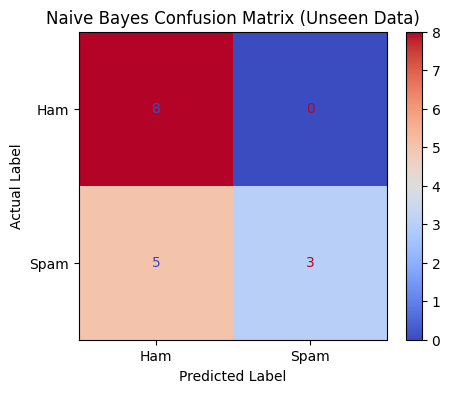


KNN — Unseen Data Performance
Accuracy: 0.5000
Classification Report:
               precision    recall  f1-score   support

         Ham       0.50      1.00      0.67         8
        Spam       0.00      0.00      0.00         8

    accuracy                           0.50        16
   macro avg       0.25      0.50      0.33        16
weighted avg       0.25      0.50      0.33        16



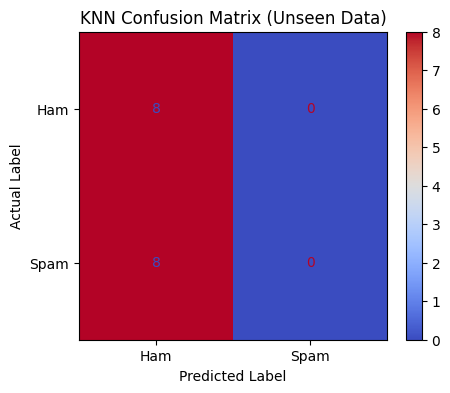


Decision Tree — Unseen Data Performance
Accuracy: 0.6250
Classification Report:
               precision    recall  f1-score   support

         Ham       0.57      1.00      0.73         8
        Spam       1.00      0.25      0.40         8

    accuracy                           0.62        16
   macro avg       0.79      0.62      0.56        16
weighted avg       0.79      0.62      0.56        16



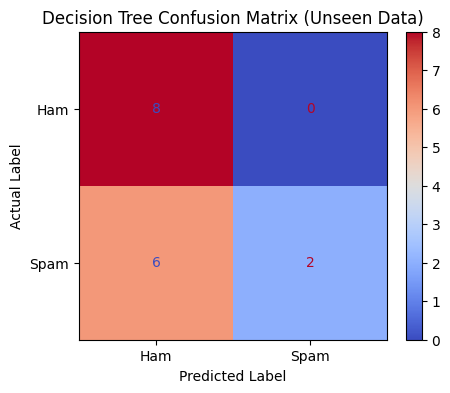


Random Forest — Unseen Data Performance
Accuracy: 0.6250
Classification Report:
               precision    recall  f1-score   support

         Ham       0.57      1.00      0.73         8
        Spam       1.00      0.25      0.40         8

    accuracy                           0.62        16
   macro avg       0.79      0.62      0.56        16
weighted avg       0.79      0.62      0.56        16



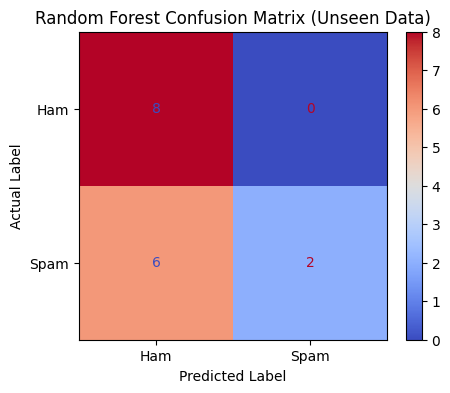

In [99]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, classification_report
import matplotlib.pyplot as plt

# Dictionary of models
models = {
    "Naive Bayes": nb_model,
    "KNN": knn_model,
    "Decision Tree": dt_model,
    "Random Forest": rf_model
}

# Loop over models, predict on unseen data, and display metrics + confusion matrix
for name, model in models.items():
    # Predict
    y_pred = model.predict(X_unseen_tfidf)

    # Metrics
    acc = accuracy_score(y_unseen, y_pred)
    report = classification_report(y_unseen, y_pred, target_names=['Ham','Spam'], zero_division=0)
    cm = confusion_matrix(y_unseen, y_pred)

    # Print metrics
    print(f"\n{name} — Unseen Data Performance")
    print(f"Accuracy: {acc:.4f}")
    print("Classification Report:\n", report)

    # Plot confusion matrix
    plt.figure(figsize=(5,4))
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Ham','Spam'])
    disp.plot(cmap='coolwarm', values_format='d', ax=plt.gca())
    plt.title(f'{name} Confusion Matrix (Unseen Data)')
    plt.xlabel('Predicted Label')
    plt.ylabel('Actual Label')
    plt.show()


### 7. Theoretical Accuracies

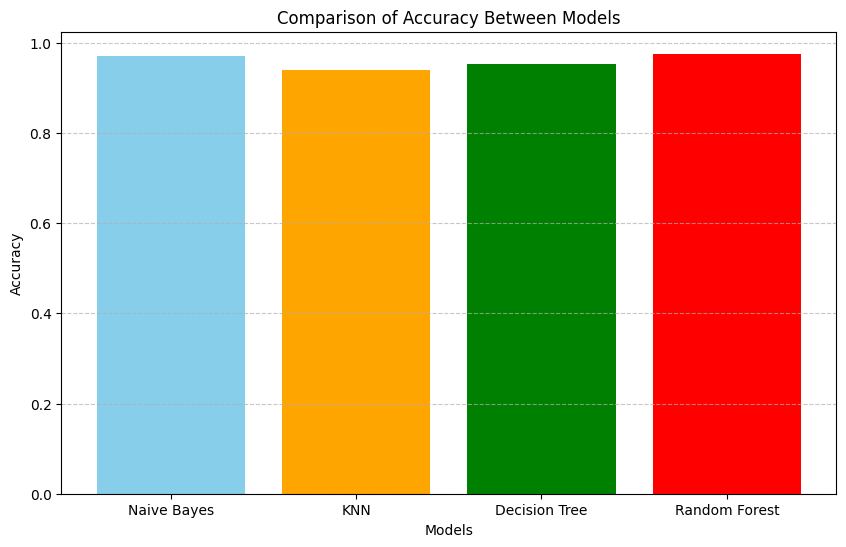

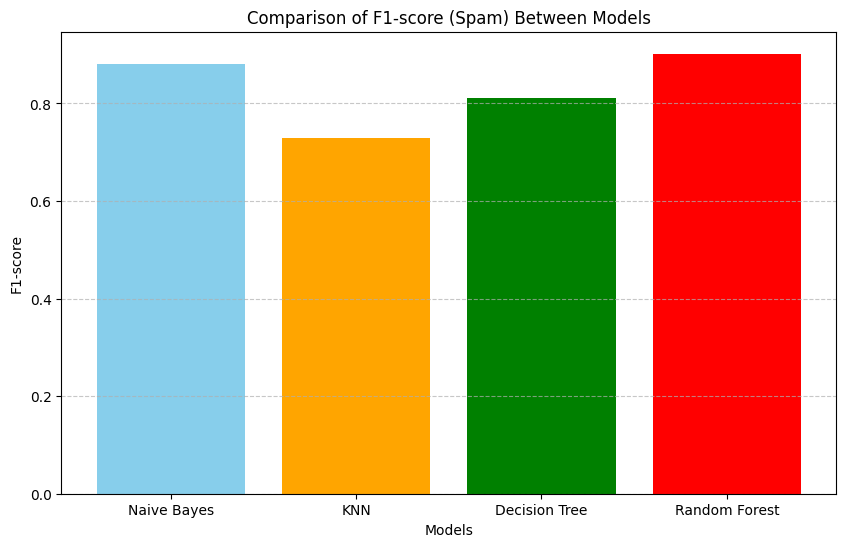

In [100]:
from sklearn.metrics import f1_score
# Final test-set performance extracted from classification reports
models = ['Naive Bayes', 'KNN', 'Decision Tree', 'Random Forest']
accuracy = [acc_nb, acc_knn, acc_dt, acc_rf]
f1_score_spam = [
    f1_score(y_test, y_pred_nb, pos_label=1, zero_division=0),
    f1_score(y_test, y_pred_knn, pos_label=1, zero_division=0),
    f1_score(y_test, y_pred_dt, pos_label=1, zero_division=0),
    f1_score(y_test, y_pred_rf, pos_label=1, zero_division=0)
]

# Function to plot comparison
def plot_comparison_classification(metric_name, values, ylabel):
    plt.figure(figsize=(10, 6))
    plt.bar(models, values, color=['skyblue', 'orange', 'green', 'red'])
    plt.title(f'Comparison of {metric_name} Between Models')
    plt.ylabel(ylabel)
    plt.xlabel('Models')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

# Plot Accuracy Comparison
plot_comparison_classification('Accuracy', accuracy, 'Accuracy')

# Plot F1-score Comparison (Spam Class)
plot_comparison_classification('F1-score (Spam)', f1_score_spam, 'F1-score')
